### Lab guide
this is a lab guide for all the code that I can reuse for my labs

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

import scienceplots  
plt.style.use(['science','notebook', 'grid'])

from matplotlib import rc
rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
rc('font', **font)

### For extracting data from an .xslx file

In [ ]:
df = pd.read_excel('natural_log.xlsx')

data_array = df.to_numpy()
transposed_array = data_array.transpose()
x = np.array(transposed_array[0])
y = np.array(transposed_array[1])

### Linear Regression

In [ ]:
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x,y, 'bo', x, poly1d_fn(x), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker
plt.xlabel(r'$\frac{L}{A}$ $[m^{-1}]$')
plt.ylabel(r'Resistance [$\Omega$]')
plt.text(0.05, 0.85, '$y = (0.21 \pm 0.07)x + (1.8 \pm 1.9)$', transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='red'))
plt.savefig('2wire.png')
plt.show()

### Another way of doing linear regression

In [ ]:
# Perform a linear fit with uncertainties
coeffs, cov = np.polyfit(x, y, 1, cov=True)  # Linear fit with covariance matrix
m, c = coeffs  # Slope and intercept
m_err, c_err = np.sqrt(np.diag(cov))  # Extract standard deviations (uncertainties)

# Generate best-fit line
x_fit = np.linspace(min(x), max(x), 500)
y_fit = m * x_fit + c

# Plotting
plt.scatter(x, y, c='blue', marker='o')
plt.plot(x_fit, y_fit, label=fr'Best-fit: $y = ({m:.2e} \pm {m_err:.2e})x + ({c:.2e} \pm {c_err:.2e})$', color='red')

# Labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data with Best-Fit Line')
plt.legend()
plt.grid(True)
plt.show()


### Least Squares Curve Fitting

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1)
colors = ['red','blue', 'green', 'purple', 'red']
ax.plot(h, p, '-')  # label='$legend_label$'

# error bars
plt.errorbar(x, y, yerr=yerr, ecolor='k', capsize=3, ls='--')

# Labels
ax.set_ylabel("Absolute Pressure [kPa]")
ax.set_xlabel("Height [m]")

# Changing the limits of the x/y axis
ax.set_xlim(-1.7, 4.3)

# Creating a text book 
ax.text(0.22, 0.075, '$A$', transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='red'))

# Legends
ax.legend()
# plt.savefig('fig1')  
plt.show()

In [ ]:
# Curve fitting
fake_x_data = np.linspace(4.99, 14, 100) # making fake data where we will plot the best fit line

def polynomial(x, a, b, c): 
    return a*x**2 + b*x + c

params, params_covariance = optimize.curve_fit(polynomial, real_x_data, real_y_data)
print(params, '\n')

fitline = []
for i in range(len(fake_x_data)):
    fitline.append(polynomial(fake_x_data[i], params[0], params[1], params[2]))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
ax.plot(fake_x_data, fitline, '--')
ax.scatter(real_x_data, real_y_data, marker = '^')

### Linear Regression for a Power Fit

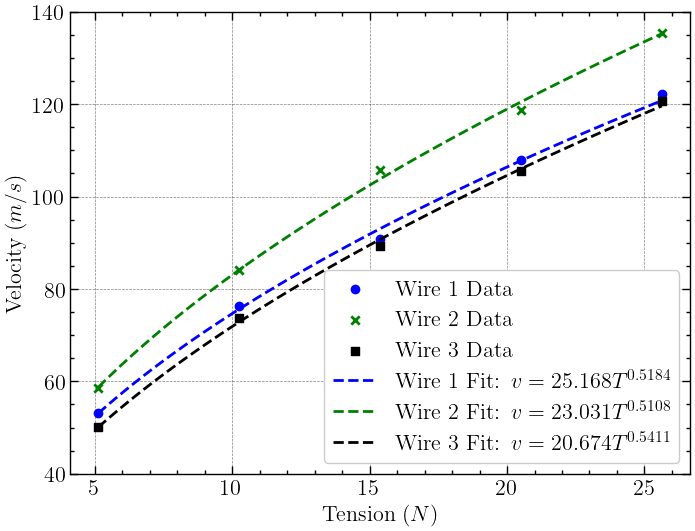

Wire 1: v = 23.0313 * T^0.5108
Wire 2: v = 25.1680 * T^0.5184
Wire 3: v = 20.6765 * T^0.5411


In [31]:
x = np.array([5.1269,10.2538,15.3807,20.5076,25.6345])
y1 = np.array([53.208,76.344,90.720,108.000,122.160])
y2 = np.array([58.56,84.00,105.65,118.80,135.36])
y3 = np.array([50.02,73.70,89.28,105.60,120.72])

# Function for power-law fitting
def power_law_fit(x, y):
    log_x = np.log(x)
    log_y = np.log(y)
    coef = np.polyfit(log_x, log_y, 1)  # Linear fit in log-log space
    b = coef[0]  # Power exponent
    a = np.exp(coef[1])  # Convert ln(a) back to a
    return a, b

# Fit power-law models
a1, b1 = power_law_fit(x, y1)
a2, b2 = power_law_fit(x, y2)
a3, b3 = power_law_fit(x, y3)

# Generate smooth fitted curves
x_fit = np.linspace(min(x), max(x), 100)
y1_fit = a1 * x_fit**b1
y2_fit = a2 * x_fit**b2
y3_fit = a3 * x_fit**b3

# Plot data and fits
plt.figure(figsize=(8,6))
plt.scatter(x, y1, label="Wire 1 Data", color="b", marker='o')
plt.scatter(x, y2, label="Wire 2 Data", color="g", marker='x')
plt.scatter(x, y3, label="Wire 3 Data", color="k", marker='s')

plt.plot(x_fit, y1_fit, 'b--', label="Wire 1 Fit: $v = 25.168 T^{0.5184}$")
plt.plot(x_fit, y2_fit, 'g--', label="Wire 2 Fit: $v = 23.031T^{0.5108}$")
plt.plot(x_fit, y3_fit, 'k--', label="Wire 3 Fit: $v = 20.674T^{0.5411}$")

# Labels and legend
plt.xlabel("Tension ($N$)")
plt.ylabel("Velocity ($m/s$)")
plt.legend()
plt.ylim(40, 140)
# plt.savefig('main.png')
plt.show()

# Print results
print(f"Wire 1: v = {a1:.4f} * T^{b1:.4f}")
print(f"Wire 2: v = {a2:.4f} * T^{b2:.4f}")
print(f"Wire 3: v = {a3:.4f} * T^{b3:.4f}")
